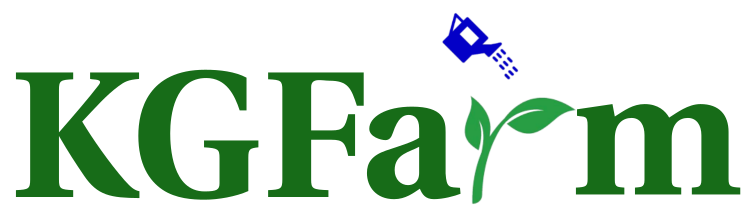
<br/>**A Data Preparation System for Data Science Across the Enterprise**

In [1]:
!git clone -b Demo https://github.com/CoDS-GCS/KGFarm.git

Cloning into 'KGFarm'...
remote: Enumerating objects: 3339, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (181/181), done.
remote: Total 3339 (delta 60), reused 238 (delta 52), pack-reused 3076
Receiving objects: 100% (3339/3339), 296.52 MiB | 12.52 MiB/s, done.
Resolving deltas: 100% (1601/1601), done.
Updating files: 100% (243/243), done.
Error downloading object: operations/Models/kgfarm_gnn_GA_0_DBLP_conf_GSAINT_QM_e10_r3_s10_lr005_layer1_w4_hc32_new_emb_v2_82split_3target.zip (f6eceaf): Smudge error: Error downloading operations/Models/kgfarm_gnn_GA_0_DBLP_conf_GSAINT_QM_e10_r3_s10_lr005_layer1_w4_hc32_new_emb_v2_82split_3target.zip (f6eceaf933b1617e121aab2a9c285b024c0e7213b264923fe687eb0f9e309663): batch response: This repository is over its data quota. Account responsible for LFS bandwidth should purchase more data packs to restore access.

Errors logged to /content/KGFarm/.git/lfs/logs/20240403T201442.909069873.log
Use `git lfs logs las

In [2]:
import os
os.chdir('/content/KGFarm')

In [3]:
!pip install -r requirements.txt

Looking in links: https://data.pyg.org/whl/torch-2.2.1+cpu.html, https://download.pytorch.org/whl/cpu/torch_stable.html
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.8/186.8 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.1/508.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 638.9/638.9 kB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
from operations.api import KGFarm
kgfarm = KGFarm(endpoint='http://206.12.92.210:7200', db='earthquake')

In [20]:
import pandas as pd
entity_df = pd.read_csv('feature_discovery/data/earthquake/seismic_activity.csv')
entity_df

,depth,gap,dmin,earthquake_id,horizontalError,depthError,magError,magnitude
0,82.770,139.0,0.8700,50000,8.46,21.213,0.097,3.10
1,79.194,104.0,1.1520,50001,5.51,7.445,0.083,4.50
2,24.000,246.0,0.8479,50002,0.91,15.950,0.090,3.93
3,63.787,187.0,0.4570,50003,10.25,6.579,0.238,4.30
4,10.000,190.0,0.4000,50004,1.41,1.999,0.085,3.00
...,...,...,...,...,...,...,...,...
26637,10.000,60.0,3.9240,76637,10.07,1.765,0.048,5.20
26638,10.000,121.0,1.8030,76638,9.17,1.870,0.042,5.10
26639,10.000,54.0,12.7760,76639,8.02,1.792,0.090,5.10
26640,153.264,61.0,3.7460,76640,8.52,7.433,0.081,4.70


# Baseline Approach

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score

entity_df_clean = entity_df.fillna(0)

X_og = entity_df_clean.drop('magnitude',axis=1)
y_og = entity_df_clean['magnitude']

X_train, X_test, y_train, y_test = train_test_split(X_og, y_og, test_size=0.30, random_state=1)

regressors = {
    'Random forest': RandomForestRegressor(),
    'Gradient boosting': GradientBoostingRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}
baseline_approach = {}
# Train and evaluate each regressor
for name, regressor in regressors.items():
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    baseline_approach[name] = r2
    print(f"{name}: Mean Squared Error = {r2}")

Random forest Regressor: Mean Squared Error = 0.8762358374573898
Gradient boosting Regressor: Mean Squared Error = 0.843811227335314
Decision Tree Regression: Mean Squared Error = 0.7698778941573875


# KGFarm Approach

## Recommending Data Enrichment

In [7]:
enrichment_info = kgfarm.search_enrichment_options(entity_df)
enrichment_info

100%|██████████| 2/2 [00:00<00:00,  2.85it/s]


,Enrich_with,Physical_joinable_table,Join_key,Joinability_strength,File_source,Dataset_feature_view
0,Feature_view_1,earthquake_stats.csv,earthquake_id,100%,feature_discovery\data\earthquake\earthquake_stats.csv,earthquake


In [8]:
entity_df = kgfarm.enrich(enrichment_info.iloc[0], entity_df)
entity_df

Enriching entity_df with 4 feature(s) ['longitude', 'nst', 'magNst', 'latitude']
feature_discovery\data\earthquake\earthquake_stats.csv


,depth,gap,dmin,earthquake_id,horizontalError,depthError,magError,longitude,nst,magNst,latitude,magnitude
0,82.770,139.0,0.8700,50000,8.46,21.213,0.097,178.5218,14.0,14.0,52.0999,3.10
1,79.194,104.0,1.1520,50001,5.51,7.445,0.083,126.7380,32.0,43.0,7.1397,4.50
2,24.000,246.0,0.8479,50002,0.91,15.950,0.090,-66.5251,23.0,16.0,19.1631,3.93
3,63.787,187.0,0.4570,50003,10.25,6.579,0.238,102.7675,17.0,5.0,-4.7803,4.30
4,10.000,190.0,0.4000,50004,1.41,1.999,0.085,-166.9417,19.0,18.0,53.3965,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...
26637,10.000,60.0,3.9240,76637,10.07,1.765,0.048,154.9829,72.0,141.0,-6.9527,5.20
26638,10.000,121.0,1.8030,76638,9.17,1.870,0.042,141.7386,74.0,187.0,32.3262,5.10
26639,10.000,54.0,12.7760,76639,8.02,1.792,0.090,68.0663,60.0,40.0,-7.2411,5.10
26640,153.264,61.0,3.7460,76640,8.52,7.433,0.081,169.0428,40.0,46.0,-19.1602,4.70


## Recommending data cleaning operations

In [9]:
cleaning_info = kgfarm.recommend_cleaning_operations(entity_df)
cleaning_info

Encoding Completed!


COMET WARNING: This method has been deprecated, we recommend using the api.get_model(...) method to get the Model Object and then using model.download(...)
COMET INFO: Downloading registry model 'cleaning', version None, stage None from workspace 'nikimonjazeb'...
COMET INFO: Unzipping model to '/content/KGFarm/operations/Models' ...
COMET INFO: done!


,Cleaning Operation,Feature
0,Interpolate,"[[gap, dmin, horizontalError, magError, nst, magNst]]"
1,IterativeImputer,"[[gap, dmin, horizontalError, magError, nst, magNst]]"
2,SimpleImputer,"[[gap, dmin, horizontalError, magError, nst, magNst]]"


In [10]:
entity_df = kgfarm.apply_cleaning_operations(cleaning_info.loc[0], entity_df)
entity_df


all features look clean


,depth,gap,dmin,earthquake_id,horizontalError,depthError,magError,longitude,nst,magNst,latitude,magnitude
0,82.770,139.0,0.8700,50000.0,8.46,21.213,0.097,178.5218,14.0,14.0,52.0999,3.10
1,79.194,104.0,1.1520,50001.0,5.51,7.445,0.083,126.7380,32.0,43.0,7.1397,4.50
2,24.000,246.0,0.8479,50002.0,0.91,15.950,0.090,-66.5251,23.0,16.0,19.1631,3.93
3,63.787,187.0,0.4570,50003.0,10.25,6.579,0.238,102.7675,17.0,5.0,-4.7803,4.30
4,10.000,190.0,0.4000,50004.0,1.41,1.999,0.085,-166.9417,19.0,18.0,53.3965,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...
26637,10.000,60.0,3.9240,76637.0,10.07,1.765,0.048,154.9829,72.0,141.0,-6.9527,5.20
26638,10.000,121.0,1.8030,76638.0,9.17,1.870,0.042,141.7386,74.0,187.0,32.3262,5.10
26639,10.000,54.0,12.7760,76639.0,8.02,1.792,0.090,68.0663,60.0,40.0,-7.2411,5.10
26640,153.264,61.0,3.7460,76640.0,8.52,7.433,0.081,169.0428,40.0,46.0,-19.1602,4.70


## Recommending feature transformations

In [11]:
transformation_info = kgfarm.recommend_transformation_operations(entity_df)
transformation_info

Encoding Completed!


COMET WARNING: This method has been deprecated, we recommend using the api.get_model(...) method to get the Model Object and then using model.download(...)
COMET INFO: Downloading registry model 'scaling-trans', version None, stage None from workspace 'nikimonjazeb'...
COMET INFO: Unzipping model to '/content/KGFarm/operations/Models' ...
COMET INFO: done!


Encoding Completed!


COMET WARNING: This method has been deprecated, we recommend using the api.get_model(...) method to get the Model Object and then using model.download(...)
COMET INFO: Downloading registry model 'unary-trans', version None, stage None from workspace 'nikimonjazeb'...
COMET INFO: Unzipping model to '/content/KGFarm/operations/Models' ...
COMET INFO: done!


,Recommended_transformation,Recommendation,Feature
0,RobustScaler,rec1,All
1,NoUnary,rec1,"[depth, depthError, dmin, earthquake_id, gap, horizontalError, latitude, longitude, magError, magNst, magnitude, nst]"
2,MinMaxScaler,rec2,All
3,Sqrt,rec2,"[depth, depthError, dmin, earthquake_id, gap, horizontalError, latitude, longitude, magError, magNst, magnitude, nst]"
4,StandardScaler,rec3,All
5,Log,rec3,"[depth, depthError, dmin, earthquake_id, gap, horizontalError, latitude, longitude, magError, magNst, magnitude, nst]"


In [13]:
entity_df = kgfarm.apply_transformation_operations(entity_df, transformation_info.iloc[[0]])
entity_df

Applying RobustScaler


,depth,gap,dmin,earthquake_id,horizontalError,depthError,magError,longitude,nst,magNst,latitude,magnitude
0,1.069308,0.214953,-0.285987,-1.000000,0.181970,3.981332,-0.103896,0.879815,-0.424242,-0.125000,0.688506,-0.937500
1,1.006387,-0.112150,-0.195371,-0.999925,-0.310518,1.125493,-0.285714,0.692581,0.121212,1.083333,-0.243443,0.156250
2,0.035226,1.214953,-0.293089,-0.999850,-1.078464,2.889649,-0.194805,-0.006195,-0.151515,-0.041667,0.005782,-0.289062
3,0.735295,0.663551,-0.418698,-0.999775,0.480801,0.945862,1.727273,0.605912,-0.333333,-0.500000,-0.490524,0.000000
4,-0.211110,0.691589,-0.437014,-0.999700,-0.994992,-0.004149,-0.259740,-0.369268,-0.272727,0.041667,0.715382,-1.015625
...,...,...,...,...,...,...,...,...,...,...,...,...
26637,-0.211110,-0.523364,0.695367,0.999700,0.450751,-0.052686,-0.740260,0.794706,1.333333,5.166667,-0.535554,0.703125
26638,-0.211110,0.046729,0.013817,0.999775,0.300501,-0.030906,-0.818182,0.746819,1.393939,7.083333,0.278630,0.625000
26639,-0.211110,-0.579439,3.539817,0.999850,0.108514,-0.047086,-0.194805,0.480444,0.969697,0.958333,-0.541532,0.625000
26640,2.309679,-0.514019,0.638170,0.999925,0.191987,1.123004,-0.311688,0.845542,0.363636,1.208333,-0.788595,0.312500


## Training after KGFarm data

In [16]:
X = entity_df.drop('magnitude',axis=1)
y = entity_df['magnitude']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

regressors = {
    'Random forest': RandomForestRegressor(),
    'Gradient boosting': GradientBoostingRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

kgfarm_approach = {}

for name, regressor in regressors.items():
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    kgfarm_approach[name] = r2
    print(f"{name}: Mean Squared Error = {r2}")


Random forest Regressor: Mean Squared Error = 0.920725085995629
Gradient boosting Regressor: Mean Squared Error = 0.8927957131558375
Decision Tree Regression: Mean Squared Error = 0.8490678520154408


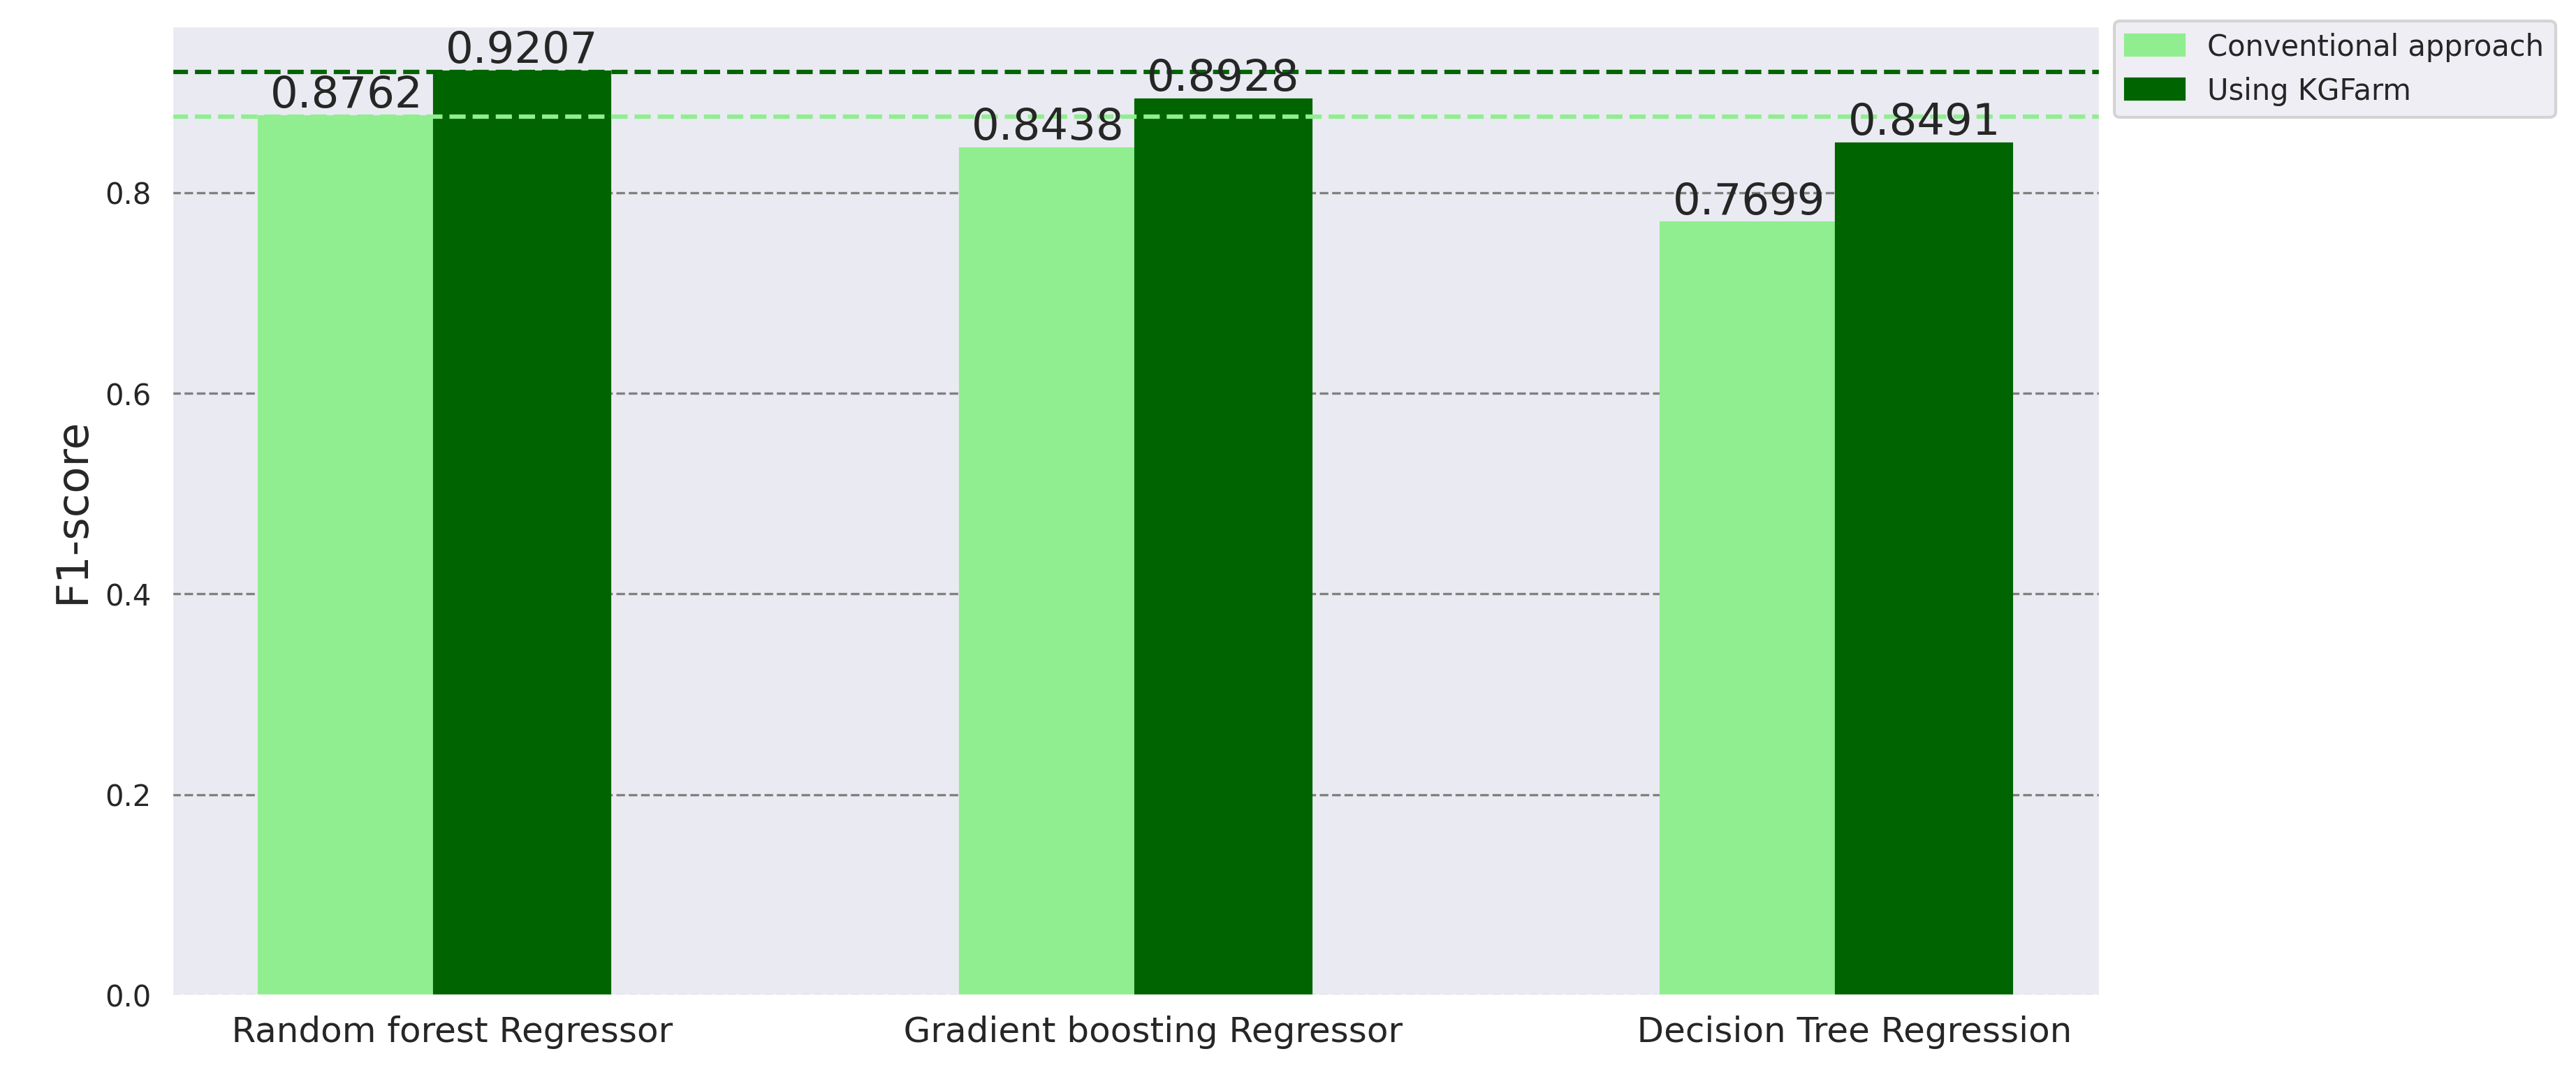

In [26]:
from helpers import helper
helper.plot_comparison(baseline_approach,kgfarm_approach)